# Fmriprep
Today, many excellent general-purpose, open-source neuroimaging software packages exist: [SPM](https://www.fil.ion.ucl.ac.uk/spm/) (Matlab-based), [FSL](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki), [AFNI](https://afni.nimh.nih.gov/), and [Freesurfer](https://surfer.nmr.mgh.harvard.edu/) (with a shell interface). We argue that there is not one single package that is always the best choice for every step in your preprocessing pipeline. Fortunately, people from the [Poldrack lab](https://poldracklab.stanford.edu/) created [fmriprep](https://fmriprep.readthedocs.io/en/stable/), a software package that offers a preprocessing pipeline which "glues together" functionality from different neuroimaging software packages (such as Freesurfer and FSL), such that each step in the pipeline is executed by the software package that (arguably) does it best.

We have been using *Fmriprep* for preprocessing of our own data and we strongly recommend it. It is relatively simple to use, requires minimal user intervention, and creates extensive visual reports for users to do visual quality control (to check whether each step in the pipeline worked as expected). The *only* requirement to use Fmriprep is that your data is formatted as specified in the Brain Imaging Data Structure (BIDS).

## The BIDS-format
[BIDS](https://bids.neuroimaging.io/) is a specification on how to format, name, and organize your MRI dataset. It specifies the file format of MRI files (i.e., compressed Nifti: `.nii.gz` files), lays out rules for how you should name your files (i.e., with "key-value" pairs, such as: `sub-01_ses-1_task-1back_run-1_bold.nii.gz`), and outlines the file/folder structure of your dataset (where each subject has its own directory with separate subdirectories for different MRI modalities, including fieldmaps, functional, diffusion, and anatomical MRI). Additionally, it specifies a way to include "metadata" about the (MRI) files in your dataset with [JSON](https://en.wikipedia.org/wiki/JSON) files: plain-text files with key-value pairs (in the form "parameter: value"). Given that your dataset is BIDS-formatted and contains the necessary metadata, you can use `fmriprep` on your dataset. (You can use the awesome [bids-validator](https://bids-standard.github.io/bids-validator/) to see whether your dataset is completely valid according to BIDS.)

There are different tools to convert your "raw" scanner data (e.g., in DICOM or PAR/REC format) to BIDS, including [heudiconv](https://heudiconv.readthedocs.io/en/latest/), [bidscoin](https://github.com/Donders-Institute/bidscoin), and [bidsify](https://github.com/NILAB-UvA/bidsify) (created by Lukas). We'll skip over this step and assume that you'll be able to convert your data to BIDS.

## Installing Fmriprep
Now, having your data in BIDS is an important step in getting started with Fmriprep. The next step is installing the package. Technically, Fmriprep is a Python package, so it can be installed as such (using `pip install fmriprep`), but this "bare metal" installation is not recommended, because it depends on a host of neuroimaging software packages (including FSL, Freesurfer, AFNI, and ANTs). So if you'd want to directly install Fmriprep, you'd need to install those extra neuroimaging software packages as well (which is not worth your time, trust us).

Fortunately, Fmriprep also offers a "Docker container" in which Fmriprep and all the associated dependencies are already installed. [Docker](https://www.docker.com/) is software that allows you to create "containers", which are like lightweight "virtual machines" ([VM](https://en.wikipedia.org/wiki/Virtual_machine)) that are like a separate (Linux-based) operating system with a specific software configuration. You can download the Fmriprep-specific docker "image", which is like a "recipe", build the Fmriprep-specific "container" according to this "recipe" on your computer, and finally use this container to run Fmriprep on your computer as if all dependencies were actually installed on your computer! Docker is available on Linux, Mac, and Windows. To install Docker, google something like "install docker for {Windows,Mac,Linux}" to find a google walkthrough.

Unfortunately, you need administrator ("root") privilege on your computer (which is likely the case for your own computer, but not on shared analysis servers) to run Docker. 

On UCloud, we can use **udocker** instead. See below for an example of this.
Read more about udocker here:
https://indigo-dc.github.io/udocker/user_manual.html

# Installing udocker and fMRIPrep
And keeping track of time

### Let's get started.
Starting with time

In [1]:
from datetime import datetime
now = datetime.now()
print('Time now:',now.strftime("%H:%M:%S"))

Time now: 22:12:03


### Installing udocker


In [2]:
# importing modules
import os
import pip
#Install udocker
now = datetime.now()
print('Starting to install udocker:',now.strftime("%H:%M:%S"))

#Using os library instead of command line
os.system('python -m pip install udocker')

now = datetime.now()
print('Finishing udocker install:',now.strftime("%H:%M:%S"))

#os.system('export UDOCKER_DIR=/work/74471/udocker')



Starting to install udocker: 22:12:03
Finishing udocker install: 22:12:06


### Pulling latest fMRIPrep
Read more about fMRIPrep here
https://fmriprep.org/en/stable/index.html


In [3]:

#Pull fmriprep
now = datetime.now()
print('Starting to pull:',now.strftime("%H:%M:%S"))

#os.system('udocker pull nipreps/fmriprep:latest')
os.system('udocker pull nipreps/fmriprep:22.0.2')
now = datetime.now()
print('Finishing pull:',now.strftime("%H:%M:%S"))



Starting to pull: 22:12:06
Finishing pull: 22:14:55


### Create an image from the pulled fMRIPrep container

In [4]:
#Create a container from the pulled image (calling it fprep)
now = datetime.now()
print('Starting to create image:',now.strftime("%H:%M:%S"))

#os.system('udocker create --name=fprep22 nipreps/fmriprep:latest')
os.system('udocker create --name=fprep2202 nipreps/fmriprep:22.0.2')
now = datetime.now()
print('Finishing image creation:',now.strftime("%H:%M:%S"))



Starting to create image: 22:14:55
Finishing image creation: 22:18:33


### Inspect and verify image

In [5]:
import os
import pip
#Performs sanity checks to verify a image available in the local repository.
print(os.popen('udocker verify fprep2202').read())

#Prints container metadata. Applies both to container images or to previously extracted containers, accepts both an image or container id as input.
print(os.popen('udocker inspect -p fprep2202').read())

#List images available in the local repository, these are images pulled form Docker Hub, and/or load or imported from files.
print(os.popen('udocker images -l').read())

#List extracted containers. These are not processes but containers extracted and available to the executed with udocker run
print(os.popen('udocker ps').read())

# Run fmriprep
#os.system('udocker run -v /path/to/data:/in -v /path/to/output:/out -v /path/to/fslicense:/fs -v /path/to/tmp:/work fprep /in /out participant --participant-label 01 02 --fs-no-reconall --fs-license-file /fs/license.txt -w /work')

Info: verifying: fprep2202:latest

/home/ucloud/.udocker/containers/7dcce286-e5db-3215-bcd7-36232c814807/ROOT

REPOSITORY
nipreps/fmriprep:22.0.2    .
  /home/ucloud/.udocker/repos/nipreps/fmriprep/22.0.2
    /sha256:345e3491a907bb7c6f1bdddcf4a94284b8b6ddd77eb7d93f09432b17b20f2bbe (27 MB)
    /sha256:57671312ef6fdbecf340e5fed0fb0863350cd806c92b1fdd7978adbd02afc5c3 (0 MB)
    /sha256:5e9250ddb7d0fa6d13302c7c3e6a0aa40390e42424caed1e5289077ee4054709 (0 MB)
    /sha256:f6495e0624c31b9b4513b9d3f55faebe7ca84a03ff31dedd74ced4ba0a590097 (147 MB)
    /sha256:931b07c97756ecd9094de38c156c15b7b290ba3941291a4c94bb2a68b8ec8e59 (0 MB)
    /sha256:d5816a41acb9cd7527b8d626ab2c1a638ef38a900ea9dba2d93f6097685d520c (1246 MB)
    /sha256:0e302d9f187bc2b6b71486044e01be0ab9dd18658f479c642649a900b58c3a78 (534 MB)
    /sha256:6a141604fda09349b5d5a694eb4c3d013f98b4087d9215b835c5c5cb585ed516 (30 MB)
    /sha256:b22909ed0235493e967bb576c6ca07ee6a13f01900c793d77c9042d8d062fad8 (21 MB)
    /sha256:16ce5b3d186ff12a6

### Free surfer license
A Freesurfer license is needed to run fmriprep. It can be obtained for free here:
https://surfer.nmr.mgh.harvard.edu/fswiki/License

It comes in the form of a "licence.txt" file.
This must be placed XXX in order for fmriprep to run.


### How to run fmriprep

The command for running fMRIPrep in a udocker container for participants "01" and "02" looks like this: 

`udocker run -v /path/to/data:/in -v /path/to/output:/out -v /path/to/fslicense:/fs -v /path/to/tmp:/work fprep /in /out participant --participant-label 01 02 --fs-no-reconall --fs-license-file /fs/license.txt -w /work`

The arguments that start with a flag "-v" (e.g. -v /path/to/data:/in) specify paths to various folders that are made available inside the container. For example, "/path/to/data" should be replaced with a folder path to brain images that are to be preprocessed, and that path will be made available inside the container as "/in". Similarly, "/path/to/output" folder should be replaced with a directory path where fMRIPrep outputs will be saved, and it is available inside the container as "/out". 

In addition `/path/to/fslicense` is a path to FreeSurfer's `license.txt` file

`path/to/tmp` is a path where fMRIPrep temporary files will be saved. This should be the base folder of the docker (i.e. `/work` on UCloud)

"fprep" is a name given to the fMRIPrep udocker container. The first two arguments that follow it are paths to input data folder and output data folder inside the container (these were defined under the previous "-v" arguments as simply /in" and "/out" and do not have to be changed). The third argument "participants" specifies that analysis is done at a participant level and that is the only analysis level supported by fMRIPrep, according to a tutorial by Stanford Centre for Reproducible Neuroscience.

All arguments after the "participants" argument are listed in the "usage" block on fMRIPrep website. For example, "--participant-label" is followed by labels of participants that should be processed, "--fs-no-reconall" specifies that FreeSurfer brain surface reconstruction is disabled, "--fs-license-file" is followed by a path (inside the container) to a FreeSurfer license file, and "-w" is followed by a path (inside the container) to a folder where temporary files should be saved. 

Note that path to FreeSurfer license file is simply "/fs/license.txt" because the actual path to a folder that contains the "license.txt" file was specified using a "-v" argument and made available in the container as "/fs".

Note that fMRIPrep needs a FreeSurfer "license.txt" file in order to run, even if FreeSurfer's workflow is disabled with "--fs-no-reconall" argument. FreeSurfer license file can be obtained freely here. In the scripts provided in this repository, FreeSurfer is disabled by default as it can take a lot of processing time. But if it is needed, "--fs-no-reconall" can be deleted from the fMRIPrep command.

#### Handling performance
It's very easy to parallelize the preprocessing pipeline by setting the `--nthreads` and `--omp-nthreads` parameters, which refer to the number of threads that should be used to run Fmriprep on. Note that laptops usually have 4 threads available (but analysis servers usually have more!). You can also specify the maximum of RAM that Fmriprep is allowed to use by the `--mem_mb` parameters. So, if you for example want to run Fmriprep with 3 threads and a maximum of 3GB of RAM, you can run:

```
udocker run ... --nthreads 3 --omp-nthreads 3 --mem_mb 3000
```

Specifying the `--mem_mb` parameter can be helpful as UCloud may otherwise crash without error. 

In [8]:
now = datetime.now()
print('Running fmriprep on one participant:',now.strftime("%H:%M:%S"))

## Don't run this here. Open a terminal, this will give you output that may be necessary if you have errors
## Running two participants
#os.system('udocker run -v /work/82777/BIDS:/in -v /work/82777/BIDS/derivatives:/out -v /work/74470:/fs -v /work:/work fprep2202 /in /out participant --participant-label 0054 0057 --ignore fieldmaps slicetiming sbref t2w flair --fs-no-reconall --fs-license-file /fs/license.txt -w /work')

##Running all participants (took 46 hours)
#os.system('udocker run -v /work/82777/BIDS:/in -v /work/82777/BIDS/derivatives:/out -v /work/74470:/fs -v /work:/work fprep2202 /in /out  participant --ignore fieldmaps slicetiming sbref t2w flair --fs-no-reconall --fs-license-file /fs/license.txt -w /work')
#
## Adding Freesurfer (doesn't seem to work)
#os.system('udocker run -v /work/82777/BIDS:/in -v /work/74471:/out -v /work/74470:/fs -v /work:/work fprep22 /in /out participant --participant-label 0058 --ignore fieldmaps slicetiming sbref t2w flair --use-aroma --fs-license-file /fs/license.txt -w /work')


now = datetime.now()
print('Finishing fmriprep on one participant:',now.strftime("%H:%M:%S"))u

Running fmriprep on one participant: 17:47:32
Finishing fmriprep on one participant: 17:47:32


### Let's see if it worked, by importing and plotting a couple of images

/opt/conda/lib/python3.10/site-packages/nilearn/image/resampling.py:545: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


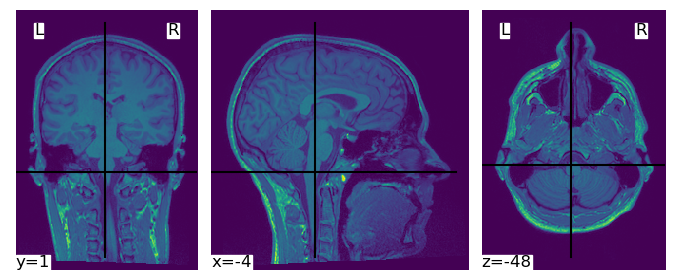

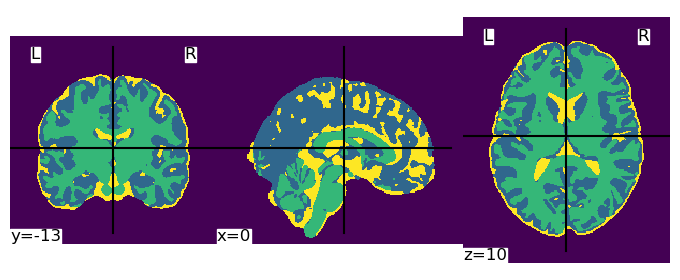

In [7]:
import os

os.system('python -m pip install nibabel')
os.system('python -m pip install matplotlib')
os.system('python -m pip install nilearn')

import nibabel as nib
import nilearn
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

os.listdir('/work/82777/BIDS/derivatives/sub-0057/anat')

brain_vol = nib.load('/work/82777/BIDS/sub-0057/anat/sub-0057_acq-T1sequence_run-1_T1w.nii.gz')
brain_vol_norm = nib.load('/work/82777/BIDS/derivatives/sub-0057/anat/sub-0057_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_dseg.nii.gz')



# What is the type of this object?
type(brain_vol)

from nilearn import plotting

plotting.plot_img(brain_vol)
plt.show()
plotting.plot_img(brain_vol_norm)
plt.show()